# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

624

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# test city list for troubleshooting to avoid excessive API calls
# when testing replace any references in code below to 'cities' with 'test'
test = ['new york', 'london', 'sydney','flamethrower', 'dubai', 'singapore']

In [4]:
# set up lists to hold response info
lat = []
lng = []
date = []
country = []
temp = []
humidity = []
cloudiness = []
wind = []

In [5]:
# build frame for url to make calls to
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

#set call count to zero
count = 0

# loop through cities in list (change to test for trouble shooting)
for city in cities:
    # add 1 to call count tracker at start of each loop
    count +=1
    # assemble url and make API request
    print(f"Processing Record {count}: {city}.")
    response = requests.get(query_url+city).json()
    
    # extract results
    try:
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        date.append(response['dt'])
        country.append(response['sys']['country'])
        temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
    # for errors report the skip and add nan values to all lists
    except (KeyError, IndexError):
        print("City not found... skipping")
        lat.append(np.nan)
        lng.append(np.nan)
        date.append(np.nan)
        country.append(np.nan)
        temp.append(np.nan)
        humidity.append(np.nan)
        cloudiness.append(np.nan)
        wind.append(np.nan)   
     
    # pause step after every batch of 50 calls to avoid API lockout
    if count%50 == 0:
        print('Waiting on API call cooldown...')
        time.sleep(60)
        

Processing Record 1: clyde river.
Processing Record 2: benjamin constant.
Processing Record 3: punta arenas.
Processing Record 4: bonavista.
Processing Record 5: kahului.
Processing Record 6: puerto ayora.
Processing Record 7: santa lucia.
Processing Record 8: hobart.
Processing Record 9: atuona.
Processing Record 10: hasaki.
Processing Record 11: hermanus.
Processing Record 12: linqiong.
Processing Record 13: rikitea.
Processing Record 14: hilo.
Processing Record 15: bluff.
Processing Record 16: kamenskoye.
City not found... skipping
Processing Record 17: kavaratti.
Processing Record 18: nikolskoye.
Processing Record 19: bredasdorp.
Processing Record 20: phan thiet.
Processing Record 21: muli.
Processing Record 22: sakakah.
Processing Record 23: kaduqli.
Processing Record 24: rio grande.
Processing Record 25: adrar.
Processing Record 26: port hedland.
Processing Record 27: college.
Processing Record 28: port alfred.
Processing Record 29: vaini.
Processing Record 30: santa maria.
Proce

Processing Record 232: morondava.
Processing Record 233: svetlaya.
Processing Record 234: halifax.
Processing Record 235: owo.
Processing Record 236: san patricio.
Processing Record 237: umm jarr.
City not found... skipping
Processing Record 238: saldanha.
Processing Record 239: alpena.
Processing Record 240: aden.
Processing Record 241: thanh hoa.
Processing Record 242: tiksi.
Processing Record 243: palabuhanratu.
City not found... skipping
Processing Record 244: yuzhno-yeniseyskiy.
City not found... skipping
Processing Record 245: iqaluit.
Processing Record 246: batagay.
Processing Record 247: saint-gaudens.
Processing Record 248: rabo de peixe.
Processing Record 249: norman wells.
Processing Record 250: baruun-urt.
Waiting on API call cooldown...
Processing Record 251: lewistown.
Processing Record 252: mount gambier.
Processing Record 253: nyurba.
Processing Record 254: honningsvag.
Processing Record 255: grindavik.
Processing Record 256: black river.
Processing Record 257: amderma.

Processing Record 460: dongsheng.
Processing Record 461: lavrentiya.
Processing Record 462: nizhniy tsasuchey.
Processing Record 463: palmer.
Processing Record 464: maragogi.
Processing Record 465: alexandria.
Processing Record 466: vao.
Processing Record 467: vavuniya.
Processing Record 468: beloha.
Processing Record 469: marrakesh.
Processing Record 470: minna.
Processing Record 471: mitsamiouli.
Processing Record 472: villazon.
Processing Record 473: gallup.
Processing Record 474: port lincoln.
Processing Record 475: ormara.
Processing Record 476: kurchum.
Processing Record 477: sibi.
Processing Record 478: bayan.
Processing Record 479: solovetskiy.
City not found... skipping
Processing Record 480: naryan-mar.
Processing Record 481: sao raimundo das mangabeiras.
Processing Record 482: hervey bay.
Processing Record 483: borogontsy.
Processing Record 484: severo-kurilsk.
Processing Record 485: bathsheba.
Processing Record 486: riviere-au-renard.
Processing Record 487: weligama.
Proces

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# build dataframe from all compiled lists
weather_df = pd.DataFrame({'City':cities,
                           'Country':country,
                           'Date (UTC)':date,
                           'Lat':lat,
                           'Lng':lng,
                           'Max Temp (F)':temp,
                           'Humidity (%)':humidity,
                           'Cloudiness (%)':cloudiness,
                           'Wind (mph)': wind})

# remove all rows where data resulted in a nan
weather_df = weather_df.dropna(how='any')

# format date column
weather_df['Date (UTC)'] = pd.to_datetime(weather_df['Date (UTC)'], unit='s')

# export dataframe to a .csv
weather_df.to_csv('../output_data/cities.csv')

# dataframe head display
weather_df

,City,Country,Date (UTC),Lat,Lng,Max Temp (F),Humidity (%),Cloudiness (%),Wind (mph)
0,clyde river,CA,2020-04-11 19:26:20,70.47,-68.59,6.80,92.0,75.0,14.99
1,benjamin constant,BR,2020-04-11 19:29:33,-4.38,-70.03,86.00,74.0,40.0,4.70
2,punta arenas,CL,2020-04-11 19:20:16,-53.15,-70.92,50.00,61.0,40.0,20.80
3,bonavista,CA,2020-04-11 19:30:29,48.65,-53.11,39.99,69.0,35.0,15.01
4,kahului,US,2020-04-11 19:23:42,20.89,-156.47,77.00,73.0,1.0,13.87
...,...,...,...,...,...,...,...,...,...
618,vila velha,BR,2020-04-11 19:40:12,-20.33,-40.29,79.00,83.0,75.0,8.05
619,jiazi,CN,2020-04-11 19:43:06,22.88,116.07,63.23,71.0,41.0,15.82
620,la asuncion,VE,2020-04-11 19:43:06,11.03,-63.86,89.60,55.0,75.0,21.92
621,priiskovyy,RU,2020-04-11 19:43:06,51.93,116.63,40.93,44.0,0.0,4.07


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

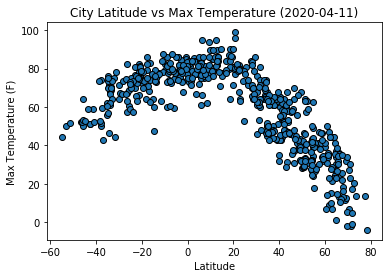

In [8]:
# set api call date to date variable and filter out time
date = (str(weather_df.iloc[0,2])).split(" ")

x_values = weather_df['Lat']
y_values = weather_df['Max Temp (F)']
# build scatterplot and add edgecolor
plt.scatter(weather_df['Lat'],weather_df['Max Temp (F)'],edgecolor='black')
# add all titles and labels
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs Max Temperature ('+date[0]+')')
# save output file
plt.savefig('../output_data/lat_vs_temp.png')
plt.show()

The plot above is a displaying a scatterplot of latitude and max temperatures for the cities in our dataframe. The pattern of the plot shows a curve of higher temperatures nearer the equator (or zero degrees latitude) and then lower temperatures as the latitude moves away from zero in either direction.

#### Latitude vs. Humidity Plot

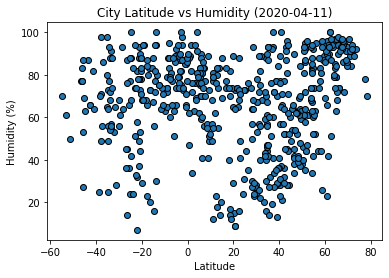

In [9]:
# build scatterplot and add edgecolor
plt.scatter(weather_df['Lat'],weather_df['Humidity (%)'],edgecolor='black')
# add all titles and labels
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs Humidity ('+date[0]+')')
# save output file
plt.savefig('../output_data/lat_vs_humidity.png')
plt.show()

The above scatter plot is displaying latitude vs humidity for the cities in our dataframe. The points are fairly random but additional analysis may be performed to see if there is any real relationship between the two variables.

#### Latitude vs. Cloudiness Plot

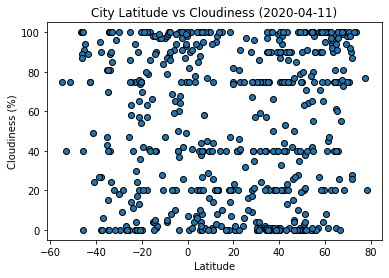

In [10]:
# build scatterplot and add edgecolor
plt.scatter(weather_df['Lat'],weather_df['Cloudiness (%)'],edgecolor='black')
# add all titles and labels
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs Cloudiness ('+date[0]+')')
# save output file
plt.savefig('../output_data/lat_vs_clouds.png')
plt.show()

The scatter plot above is plotting latitude vs cloudiness (%) for all of the cities in our data frame. The lack of any real pattern shows that cloudiness is fairly even across the different latitudes with some cities seeing more clouds than others. The grouping of points at set cloudiness values may indicate that the measurements bias towards certain numbers.

#### Latitude vs. Wind Speed Plot

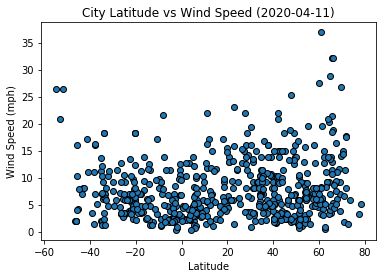

In [11]:
# build scatterplot and add edgecolor
plt.scatter(weather_df['Lat'],weather_df['Wind (mph)'],edgecolor='black')
# add all titles and labels
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitude vs Wind Speed ('+date[0]+')')
# save output file
plt.savefig('../output_data/lat_vs_wind.png')
plt.show()

The scatter plot above is plotting latitude vs wind speed (mph) for all of the cities in our data frame. The lack of any real pattern shows that wind speed is fairly even across the different latitudes with some cities experiencing higher winds but at no obvious trend towards latitude.

## Linear Regression

In [12]:
# Creates a function to create Linear Regression plots
def linreg(x_values,y_values):
    # Pulled linregress values
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    # Calculate regress values for every point in x_value set
    regress_values = x_values * slope + intercept
    # Generate scatter plot
    plt.scatter(x_values,y_values)
    # Generate regression line
    plt.plot(x_values,regress_values,"r-")
    #set up line equation and add to graph
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.annotate(line_eq,(x_values.min(),y_values.min()),fontsize=10,color="red")
    # Print correlation value.
    print(f"The r-squared is {round(rvalue,2)}")
    return;

In [13]:
# Create Northern and Southern Hemisphere DataFrames
northern = weather_df.loc[weather_df.Lat>0,:]
southern = weather_df.loc[weather_df.Lat<0,:]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is -0.89


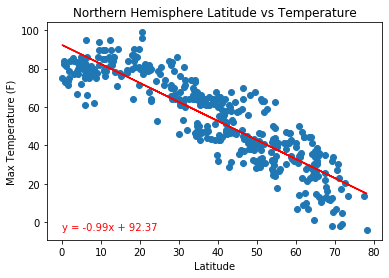

In [14]:
# Run linreg function
linreg(x_values=northern['Lat'],y_values=northern['Max Temp (F)'])
# Add axis labels and title
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere Latitude vs Temperature')
# Print correlation value.
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is 0.71


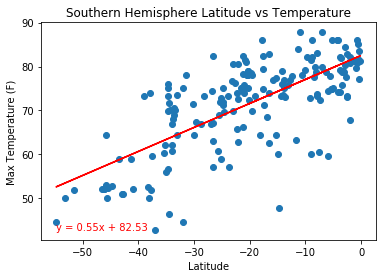

In [15]:
# Run linreg function
linreg(x_values=southern['Lat'],y_values=southern['Max Temp (F)'])
# Add axis labels and title
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere Latitude vs Temperature')
# Print correlation value.
plt.show()

This linear regression is modeling the relationship between latitude and max temperature (F) in the two hemispheres and finds a positive relationship in the southern hemisphere and negative relationship in the northern. This linear regression is predicting that as you approach latitude zero, or the equator, temperature increases. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is 0.24


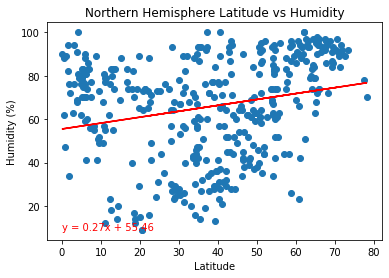

In [16]:
# Run linreg function
linreg(x_values=northern['Lat'],y_values=northern['Humidity (%)'])
# Add axis labels and title
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere Latitude vs Humidity')
# Print correlation value.
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is 0.26


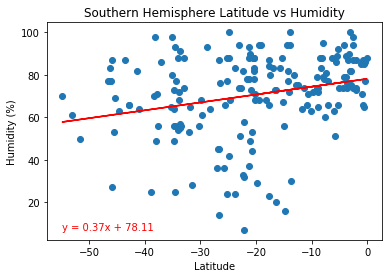

In [17]:
# Run linreg function
linreg(x_values=southern['Lat'],y_values=southern['Humidity (%)'])
# Add axis labels and title
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere Latitude vs Humidity')
# Print correlation value.
plt.show()

This linear regression is modeling the relationship between latitude and humidity in the two hemispheres and finds no real relationship between the two as the r-squared values are very close to each other and zero. The lack of any effective difference shows that humidity as a whole has no real bias towards either hemisphere right now.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is 0.25


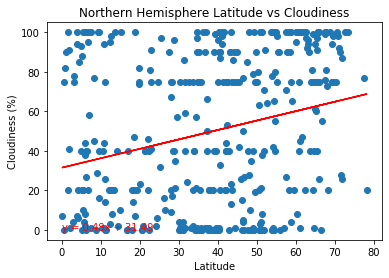

In [18]:
# Run linreg function
linreg(x_values=northern['Lat'],y_values=northern['Cloudiness (%)'])
# Add axis labels and title
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere Latitude vs Cloudiness')
# Print correlation value.
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is 0.12


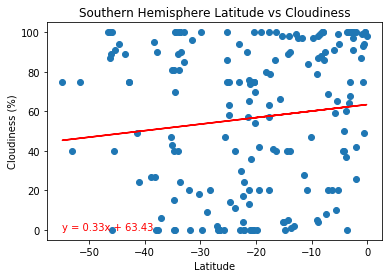

In [19]:
# Run linreg function
linreg(x_values=southern['Lat'],y_values=southern['Cloudiness (%)'])
# Add axis labels and title
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere Latitude vs Cloudiness')
# Print correlation value.
plt.show()

This linear regression is modeling the relationship between latitude and cloudiness in the two hemispheres and finds no real relationship between the two as the r-squared values are very close to zero. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is 0.19


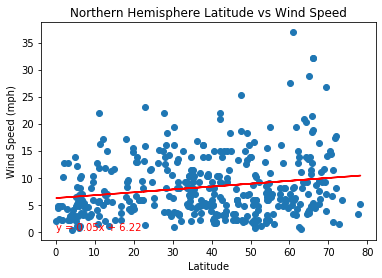

In [20]:
# Run linreg function
linreg(x_values=northern['Lat'],y_values=northern['Wind (mph)'])
# Add axis labels and title
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere Latitude vs Wind Speed')
# Print correlation value.
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is -0.29


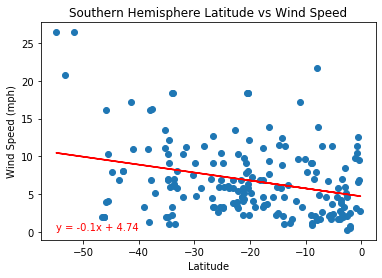

In [21]:
# Run linreg function
linreg(x_values=southern['Lat'],y_values=southern['Wind (mph)'])
# Add axis labels and title
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere Latitude vs Wind Speed')
# Print correlation value.
plt.show()

This linear regression is modeling the relationship between latitude and wind speed (mph) in the two hemispheres and finds no real relationship between the two as the r-squared values are very close to zero. 

Final Analysis
Latitude is shows a clear relationship with temperature, with temperatures raising as latitude increases zero, indicating a move towards the equator. Temperatues are higher as a group for latitudes below zero, or below the equator, however there are also less cities at latitudes far from latitude zero, with none past -60. This could be an effect of the random data call for the city list building or due to an actual lack of cities in those locations. 
Wind speed, humidity, and cloud coverage all have very poor relationships to temperature, with none having an r-squared value above [.3]. This suggests that none of this weather factors are related to latitude. There also was not any clear difference in those three factors between the southern and northern hemisphere.